In [10]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [11]:
# Read the first CSV file
df1 = pd.read_csv(r"E:\AAVrg_cFos_Sm\Anymaze_data\AAVrg_Cfos_SM_SA_Left.csv")

# Read the second CSV file
df2 = pd.read_csv(r"E:\AAVrg_cFos_Sm\Anymaze_data\AAVrg_Cfos_SM_SA_Right.csv")

# Rename columns in the first DataFrame
df1.rename(columns={
    'Novel Agent Right : time investigating (s)': 'Novel',
    'Social Agent Left : time investigating (s)': 'Social Agent'}, 
    inplace=True)

# Rename columns in the second DataFrame
df2.rename(columns={
    'Social Agent Right : time investigating (s)': 'Social Agent',
    'Novel Agent Left : time investigating (s)': 'Novel'},
    inplace=True)

# Concatenate the DataFrames along the rows
combined_df = pd.concat([df1, df2], ignore_index=True)


# Display the combined DataFrame
combined_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1,Chamber 1,Familiar,37.8,53.7,298.3,100.0,119.5
1,2,1.3,Chamber 2,Familiar,26.0,64.5,266.1,64.3,118.3
2,3,2.2,Chamber 3,Familiar,12.6,99.9,267.0,40.3,167.9
3,4,3.1,Chamber 4,Cagemate,47.7,13.2,279.2,134.7,52.8
4,5,3.3,Chamber 5,Cagemate,36.4,48.7,245.9,102.7,105.6
5,6,4.2,Chamber 6,Cagemate,33.0,42.1,278.2,91.1,109.0
6,1,1.2,Chamber 1,Familiar,43.6,34.1,281.2,104.3,108.6
7,2,2.1,Chamber 2,Familiar,27.4,51.3,233.4,134.5,62.1
8,3,2.3,Chamber 3,Familiar,18.2,53.4,239.1,151.5,53.8
9,4,3.2,Chamber 4,Cagemate,11.0,101.6,189.6,116.2,43.0


In [12]:
# Filter rows for cagemates
cagemate_df = combined_df[combined_df['Animal notes'] == 'Cagemate']
cagemate_df.reset_index(drop=True, inplace=True)
# Filter rows for familiar
familiar_df = combined_df[combined_df['Animal notes'] == 'Familiar']
familiar_df.reset_index(drop=True, inplace=True)

# Display cagemate_df and familiar_df
cagemate_df
familiar_df
cagemate_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,4,3.1,Chamber 4,Cagemate,47.7,13.2,279.2,134.7,52.8
1,5,3.3,Chamber 5,Cagemate,36.4,48.7,245.9,102.7,105.6
2,6,4.2,Chamber 6,Cagemate,33.0,42.1,278.2,91.1,109.0
3,4,3.2,Chamber 4,Cagemate,11.0,101.6,189.6,116.2,43.0
4,5,4.1,Chamber 5,Cagemate,32.0,56.0,284.7,123.7,105.2
5,6,4.3,Chamber 6,Cagemate,23.1,58.0,227.1,111.1,62.2


In [13]:
familiar_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1,Chamber 1,Familiar,37.8,53.7,298.3,100.0,119.5
1,2,1.3,Chamber 2,Familiar,26.0,64.5,266.1,64.3,118.3
2,3,2.2,Chamber 3,Familiar,12.6,99.9,267.0,40.3,167.9
3,1,1.2,Chamber 1,Familiar,43.6,34.1,281.2,104.3,108.6
4,2,2.1,Chamber 2,Familiar,27.4,51.3,233.4,134.5,62.1
5,3,2.3,Chamber 3,Familiar,18.2,53.4,239.1,151.5,53.8


In [14]:
# Calculate summary statistics
summary_stats = combined_df[['Novel', 'Social Agent']].describe()

# Calculate summary statistics for cagemates
cagemate_summary_stats = cagemate_df[cagemate_df['Animal notes'] == 'Cagemate'][['Novel', 'Social Agent']].describe()

# Calculate summary statistics for familiar
familiar_summary_stats = familiar_df[familiar_df['Animal notes'] == 'Familiar'][['Novel', 'Social Agent']].describe()

# Print summary statistics
print("Summary Statistics for Investigation Time:")
print(summary_stats)

print("Summary Statistics for Cagemate Social Agents:")
print(cagemate_summary_stats)

print("Summary Statistics for Familiar Social Agents:")
print(familiar_summary_stats)


Summary Statistics for Investigation Time:
          Novel  Social Agent
count   12.0000     12.000000
mean    56.3750     29.066667
std     24.6304     11.583557
min     13.2000     11.000000
25%     47.0500     21.875000
50%     53.5500     29.700000
75%     59.6250     36.750000
max    101.6000     47.700000
Summary Statistics for Cagemate Social Agents:
            Novel  Social Agent
count    6.000000      6.000000
mean    53.266667     30.533333
std     28.694506     12.443097
min     13.200000     11.000000
25%     43.750000     25.325000
50%     52.350000     32.500000
75%     57.500000     35.550000
max    101.600000     47.700000
Summary Statistics for Familiar Social Agents:
           Novel  Social Agent
count   6.000000      6.000000
mean   59.483333     27.600000
std    22.092570     11.627553
min    34.100000     12.600000
25%    51.825000     20.150000
50%    53.550000     26.700000
75%    61.800000     35.200000
max    99.900000     43.600000


In [15]:
# Perform independent samples t-test and print results
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent Samples T-test Results:
T-statistic: 3.1282191369842924
P-value: 0.010722935419310355


In [16]:
familiar_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1,Chamber 1,Familiar,37.8,53.7,298.3,100.0,119.5
1,2,1.3,Chamber 2,Familiar,26.0,64.5,266.1,64.3,118.3
2,3,2.2,Chamber 3,Familiar,12.6,99.9,267.0,40.3,167.9
3,1,1.2,Chamber 1,Familiar,43.6,34.1,281.2,104.3,108.6
4,2,2.1,Chamber 2,Familiar,27.4,51.3,233.4,134.5,62.1
5,3,2.3,Chamber 3,Familiar,18.2,53.4,239.1,151.5,53.8


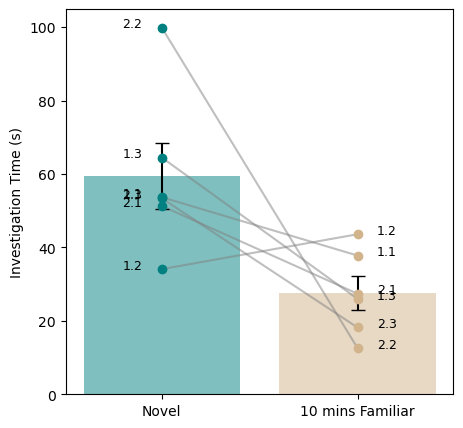

In [17]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = familiar_df['Novel'].mean()
social_agent_mean = familiar_df['Social Agent'].mean()

novel_sem = familiar_df['Novel'].sem()
social_agent_sem = familiar_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(5,5))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['teal', 'tan'], alpha=0.5, capsize=5, ecolor='black')

# Add individual data points
for i, (novel, familiar) in enumerate(zip(familiar_df['Novel'], familiar_df['Social Agent'])):
    plt.scatter(x[0], novel, color='teal', zorder=5)  # Novel data points
    plt.scatter(x[1], familiar, color='tan', zorder=5)  # Familiar data points
    
    # Add a connecting line between data points
    plt.plot([x[0], x[1]], [novel, familiar], color='gray', alpha=0.5, zorder=1)

    # Add labels for each subject near their data points
    plt.text(x[0] - 0.1, novel, familiar_df['Animal'][i], fontsize=9, color='black', ha='right')
    plt.text(x[1] + 0.1, familiar, familiar_df['Animal'][i], fontsize=9, color='black', ha='left')


# Add labels and title
plt.ylabel('Investigation Time (s)')


# Set x-axis ticks and labels
plt.xticks(x, ['Novel', '10 mins Familiar'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()


In [18]:
familiar_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1,Chamber 1,Familiar,37.8,53.7,298.3,100.0,119.5
1,2,1.3,Chamber 2,Familiar,26.0,64.5,266.1,64.3,118.3
2,3,2.2,Chamber 3,Familiar,12.6,99.9,267.0,40.3,167.9
3,1,1.2,Chamber 1,Familiar,43.6,34.1,281.2,104.3,108.6
4,2,2.1,Chamber 2,Familiar,27.4,51.3,233.4,134.5,62.1
5,3,2.3,Chamber 3,Familiar,18.2,53.4,239.1,151.5,53.8


In [19]:
# Extract the investigation time data for novel and social agent stimuli
novel_investigation_time = cagemate_df['Novel']
cagemate_agent_investigation_time = cagemate_df['Social Agent']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(novel_investigation_time, cagemate_agent_investigation_time)

# Print the results
print("Independent Samples T-test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Independent Samples T-test Results:
T-statistic: 1.7804251972804461
P-value: 0.1053542221728941


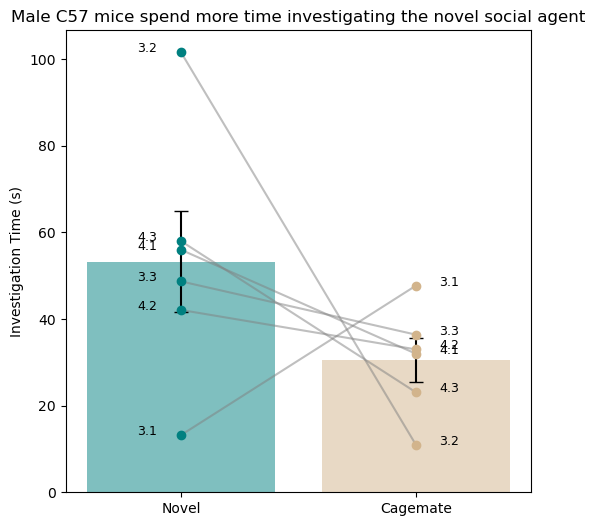

In [20]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = cagemate_df['Novel'].mean()
social_agent_mean = cagemate_df['Social Agent'].mean()

novel_sem = cagemate_df['Novel'].sem()
social_agent_sem = cagemate_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(cagemate_df['Novel'], cagemate_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(6, 6))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['teal', 'tan'], alpha=0.5, capsize=5, ecolor='black')

# Add individual data points
for i, (novel, cagemate) in enumerate(zip(cagemate_df['Novel'], cagemate_df['Social Agent'])):
    plt.scatter(x[0], novel, color='teal', zorder=5)  # Novel data points
    plt.scatter(x[1], cagemate, color='tan', zorder=5)  # Familiar data points
    
    # Add a connecting line between data points
    plt.plot([x[0], x[1]], [novel, cagemate], color='gray', alpha=0.5, zorder=1)

    # Add labels for each subject near their data points
    plt.text(x[0] - 0.1, novel, cagemate_df['Animal'][i], fontsize=9, color='black', ha='right')
    plt.text(x[1] + 0.1, cagemate, cagemate_df['Animal'][i], fontsize=9, color='black', ha='left')


# Add labels and title
plt.ylabel('Investigation Time (s)')
plt.title('Male C57 mice spend more time investigating the novel social agent')

# Set x-axis ticks and labels
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()


In [21]:
cagemate_df

,Test,Animal,Apparatus,Animal notes,Social Agent,Novel,Whole_chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,4,3.1,Chamber 4,Cagemate,47.7,13.2,279.2,134.7,52.8
1,5,3.3,Chamber 5,Cagemate,36.4,48.7,245.9,102.7,105.6
2,6,4.2,Chamber 6,Cagemate,33.0,42.1,278.2,91.1,109.0
3,4,3.2,Chamber 4,Cagemate,11.0,101.6,189.6,116.2,43.0
4,5,4.1,Chamber 5,Cagemate,32.0,56.0,284.7,123.7,105.2
5,6,4.3,Chamber 6,Cagemate,23.1,58.0,227.1,111.1,62.2


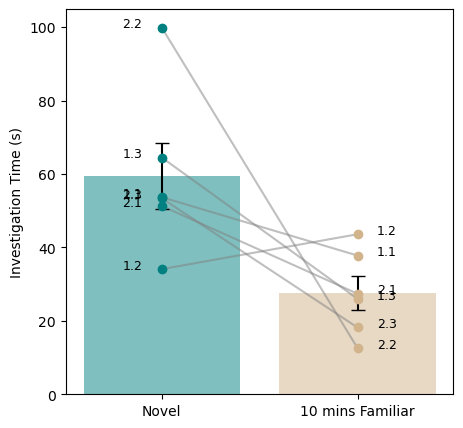

In [22]:
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = familiar_df['Novel'].mean()
social_agent_mean = familiar_df['Social Agent'].mean()

novel_sem = familiar_df['Novel'].sem()
social_agent_sem = familiar_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(5,5))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['teal', 'tan'], alpha=0.5, capsize=5, ecolor='black')

# Add individual data points
for i, (novel, familiar) in enumerate(zip(familiar_df['Novel'], familiar_df['Social Agent'])):
    plt.scatter(x[0], novel, color='teal', zorder=5)  # Novel data points
    plt.scatter(x[1], familiar, color='tan', zorder=5)  # Familiar data points
    
    # Add a connecting line between data points
    plt.plot([x[0], x[1]], [novel, familiar], color='gray', alpha=0.5, zorder=1)

    # Add labels for each subject near their data points
    plt.text(x[0] - 0.1, novel, familiar_df['Animal'][i], fontsize=9, color='black', ha='right')
    plt.text(x[1] + 0.1, familiar, familiar_df['Animal'][i], fontsize=9, color='black', ha='left')


# Add labels and title
plt.ylabel('Investigation Time (s)')


# Set x-axis ticks and labels
plt.xticks(x, ['Novel', '10 mins Familiar'])

# Remove grid lines
plt.grid(False)

# Show plot
plt.show()

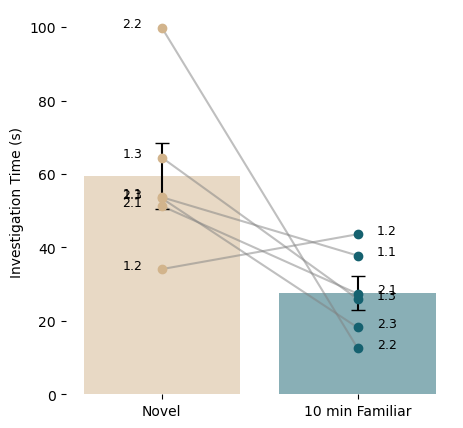

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Assuming familiar_df is already defined
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = familiar_df['Novel'].mean()
social_agent_mean = familiar_df['Social Agent'].mean()

novel_sem = familiar_df['Novel'].sem()
social_agent_sem = familiar_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(familiar_df['Novel'], familiar_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(5, 5))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['tan', '#15616F'], alpha=0.5, capsize=5, ecolor='black'
)

# Add individual data points
for i, (novel, familiar) in enumerate(zip(familiar_df['Novel'], familiar_df['Social Agent'])):
    plt.scatter(x[0], novel, color='tan', zorder=5)  # Novel data points
    plt.scatter(x[1], familiar, color='#15616F', zorder=5)  # Familiar data points
    
    # Add a connecting line between data points
    plt.plot([x[0], x[1]], [novel, familiar], color='gray', alpha=0.5, zorder=1)

    # Add labels for each subject near their data points
    plt.text(x[0] - 0.1, novel, familiar_df['Animal'][i], fontsize=9, color='black', ha='right')
    plt.text(x[1] + 0.1, familiar, familiar_df['Animal'][i], fontsize=9, color='black', ha='left')

# Add labels and title
plt.ylabel('Investigation Time (s)')

# Set x-axis ticks and labels
plt.xticks(x, ['Novel', '10 min Familiar'])

# Remove the plot frame (box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show plot
plt.show()


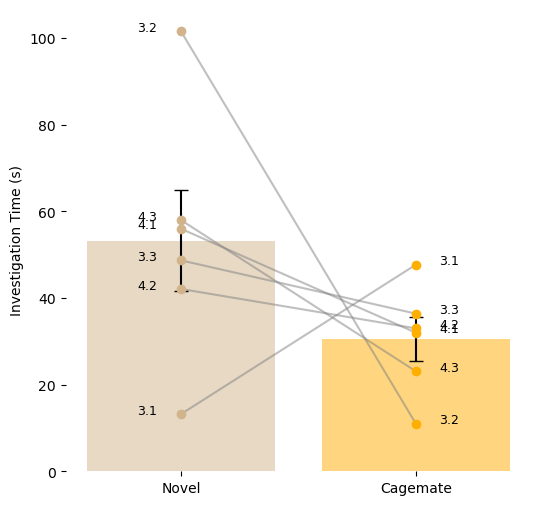

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Assuming cagemate_df is already defined
# Calculate the mean and SEM for 'Novel' and 'Social Agent' stimuli
novel_mean = cagemate_df['Novel'].mean()
social_agent_mean = cagemate_df['Social Agent'].mean()

novel_sem = cagemate_df['Novel'].sem()
social_agent_sem = cagemate_df['Social Agent'].sem()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(cagemate_df['Novel'], cagemate_df['Social Agent'])

# Define x positions for the bars
x = np.arange(2)

# Create a bar plot with error bars for SEM
plt.figure(figsize=(6, 6))
plt.bar(
    x, [novel_mean, social_agent_mean],
    yerr=[novel_sem, social_agent_sem], 
    color=['#D2B48C', '#FFAF00'], alpha=0.5, capsize=5, ecolor='black'
)

# Add individual data points
for i, (novel, cagemate) in enumerate(zip(cagemate_df['Novel'], cagemate_df['Social Agent'])):
    plt.scatter(x[0], novel, color='#D2B48C', zorder=5)  # Novel data points
    plt.scatter(x[1], cagemate, color='#FFAF00', zorder=5)  # Cagemate data points
    
    # Add a connecting line between data points
    plt.plot([x[0], x[1]], [novel, cagemate], color='gray', alpha=0.5, zorder=1)

    # Add labels for each subject near their data points
    plt.text(x[0] - 0.1, novel, cagemate_df['Animal'][i], fontsize=9, color='black', ha='right')
    plt.text(x[1] + 0.1, cagemate, cagemate_df['Animal'][i], fontsize=9, color='black', ha='left')

# Add labels and title
plt.ylabel('Investigation Time (s)')


# Set x-axis ticks and labels
plt.xticks(x, ['Novel', 'Cagemate'])

# Remove the plot frame (box)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Show plot
plt.show()
